# Data Analysis

In [83]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# Load the dataset
df = pd.read_csv("/kaggle/input/titanic/train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [85]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [86]:
# Display first 5 rows of data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


*Penjelasan:*
* Ini adalah tahap import library dan data dari file Titanic dataset.
* Data akan di-load ke dalam **DataFrame df**.

# Data Cleaning

In [87]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [88]:
# Fill missing values for 'Age' with median
df['Age'] = df['Age'].fillna(df['Age'].median())

In [89]:
# Fill missing 'Embarked' with the most frequent value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [90]:
df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

In [91]:
# Display summary of missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [92]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


*Penjelasan:*
* Nilai kosong di kolom **Age** diisi dengan median.
* Nilai kosong di **Embarked** diisi dengan nilai yang paling sering muncul.
* Kolom **Cabin, Tiket, Nama** dihapus.
* Baris yang tidak memiliki nilai Fare dibuang.

# Preprocessing Data

In [93]:
# Data Preprocessing
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # Male: 1, Female: 0
df['Embarked'] = le.fit_transform(df['Embarked'])  # Encode Embarked

In [94]:
# Create new feature: Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [95]:
# Drop unnecessary columns
df.drop(columns=['PassengerId'], inplace=True)

In [115]:
# Check the cleaned and processed dataset
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,1,22.0,1,0,7.2500,2,2
1,1,1,0,38.0,1,0,71.2833,0,2
2,1,3,0,26.0,0,0,7.9250,2,1
3,1,1,0,35.0,1,0,53.1000,2,2
4,0,3,1,35.0,0,0,8.0500,2,1


*Penjelasan:*
* Fitur **Sex** dan **Embarked** diencoding menggunakan **LabelEncoder**.
* Fitur baru **FamilySize** dibuat dari penjumlahan **SibSp** dan **Parch**.
* Kolom **PassengerId** dihapus karna tidak diperlukan .

# Train-Test Split

In [97]:
# Split the dataset
X = df.drop(columns=['Survived'])
y = df['Survived']

In [98]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Check the shape of training and test sets
X_train.shape, X_test.shape

((712, 8), (179, 8))

*Penjelasan:*

* Dataset dipecah menjadi **fitur (X) dan target (y)**.
* Dataset dibagi menjadi set **pelatihan (80%) dan set pengujian (20%)**.

# Modeling: Random Forest

In [100]:
# Model Training: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
# Model Predictions
y_pred_rf = rf_model.predict(X_test)

In [102]:
# Evaluation: Random Forest
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {acc_rf:.2f}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



*Penjelasan:*

* Melatih model Random Forest pada set pelatihan.
* Prediksi dilakukan pada set pengujian.
* Akurasi dan laporan klasifikasi ditampilkan.

# Confusion Matrix (Random Forest)

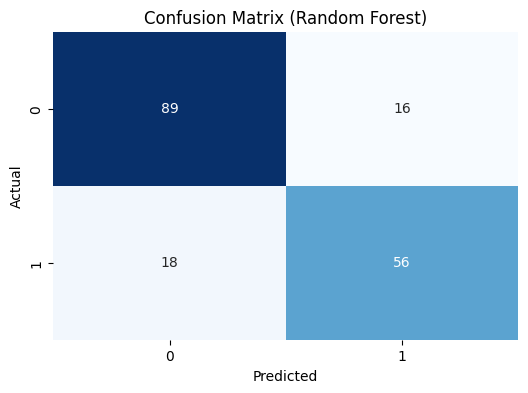

In [103]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

*Penjelasan:*

* Menampilkan **Confusion Matrix** dari model Random Forest untuk melihat prediksi yang benar dan salah.

# ROC Curve (Random Forest)

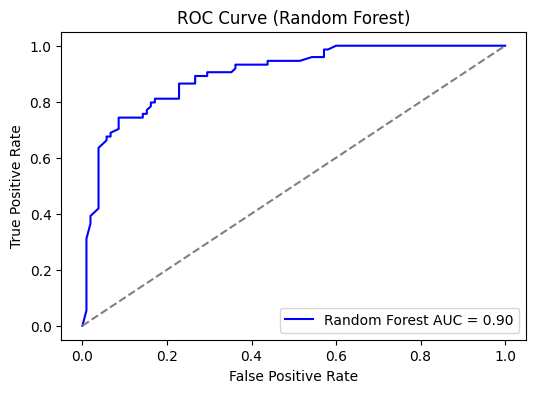

In [104]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6,4))
plt.plot(fpr_rf, tpr_rf, color='blue', label=f'Random Forest AUC = {roc_auc_rf:.2f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.title('ROC Curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

*Penjelasan:*

* Membuat **ROC Curve** untuk Random Forest, yang menunjukkan *trade-off* antara *true positive rate dan false positive rate*.
* **AUC** dihitung untuk mengukur performa model secara keseluruhan.

# Feature Importance (Random Forest)

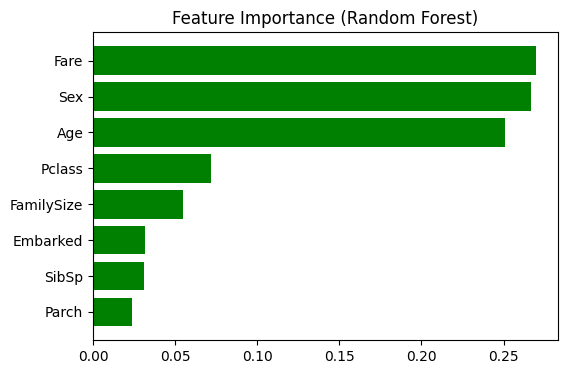

In [105]:
# Feature Importance for Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)
features = X.columns

plt.figure(figsize=(6,4))
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importance (Random Forest)')
plt.show()

*Penjelasan:*

* Menampilkan **Feature Importance**, yang menunjukkan fitur mana yang paling berpengaruh terhadap prediksi survival dalam model Random Forest.


# Model Comparison: Logistic Regression, SVM, KNN

Logistic Regression Accuracy: 0.80


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


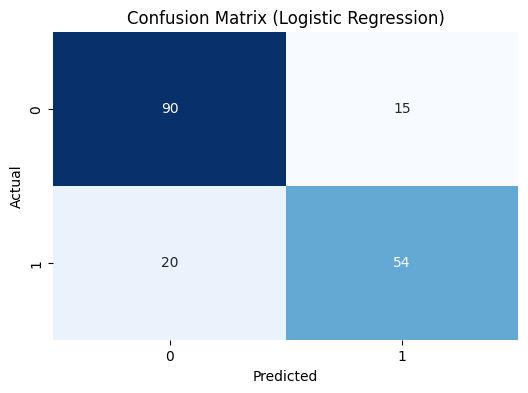

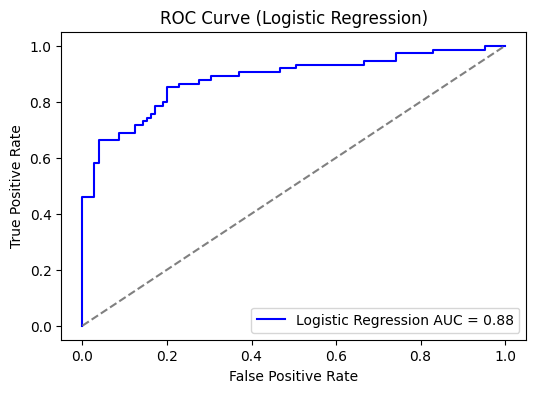

Support Vector Machine Accuracy: 0.67


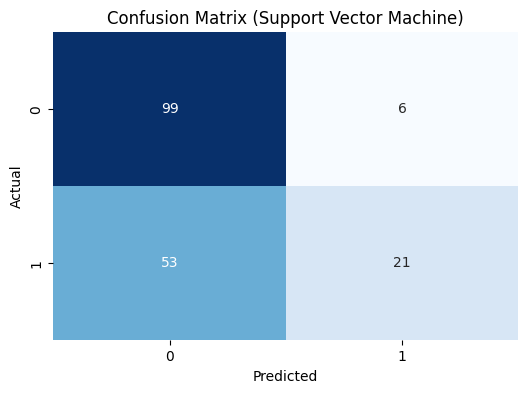

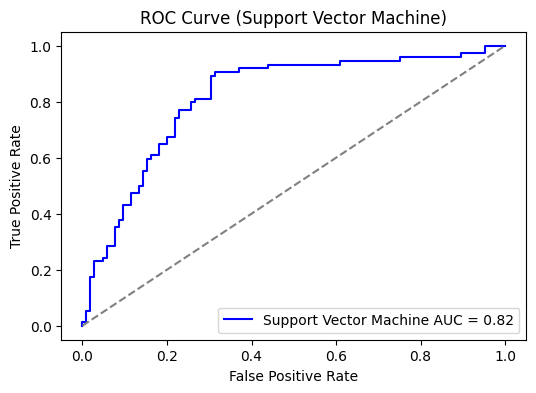

K-Nearest Neighbors Accuracy: 0.70


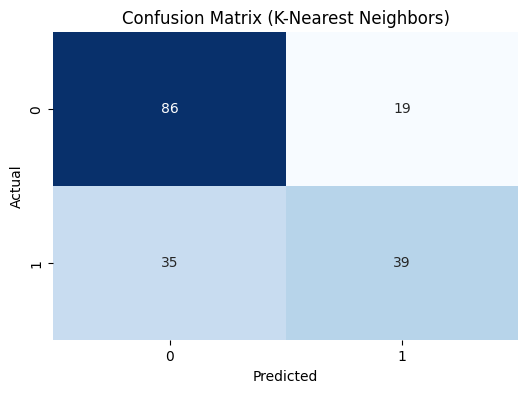

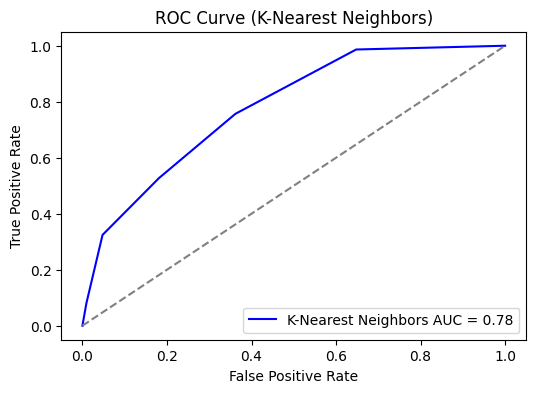

In [106]:
# Model Comparison: Logistic Regression, SVM, KNN
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {acc:.2f}')
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'Confusion Matrix ({model_name})')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, color='blue', label=f'{model_name} AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
    plt.title(f'ROC Curve ({model_name})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()


*Penjelasan:*

* Membandingkan performa model **Logistic Regression, SVM, dan KNN**.
* Akurasi, Confusion Matrix, dan ROC Curve ditampilkan untuk setiap model.

# Model Accuracy Comparison

In [107]:
# Dictionary to store model accuracies
model_accuracies = {}

In [108]:
# Random Forest Accuracy
rf_acc = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = rf_acc

In [109]:
# Model Comparison: Logistic Regression, SVM, KNN
# For each model, calculate and store accuracy
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = acc

In [110]:
# Convert the dictionary into a DataFrame for easier comparison
accuracy_df = pd.DataFrame(list(model_accuracies.items()), columns=['Model', 'Accuracy'])

In [111]:
# Sort the DataFrame by accuracy in descending order
accuracy_df.sort_values(by='Accuracy', ascending=False, inplace=True)

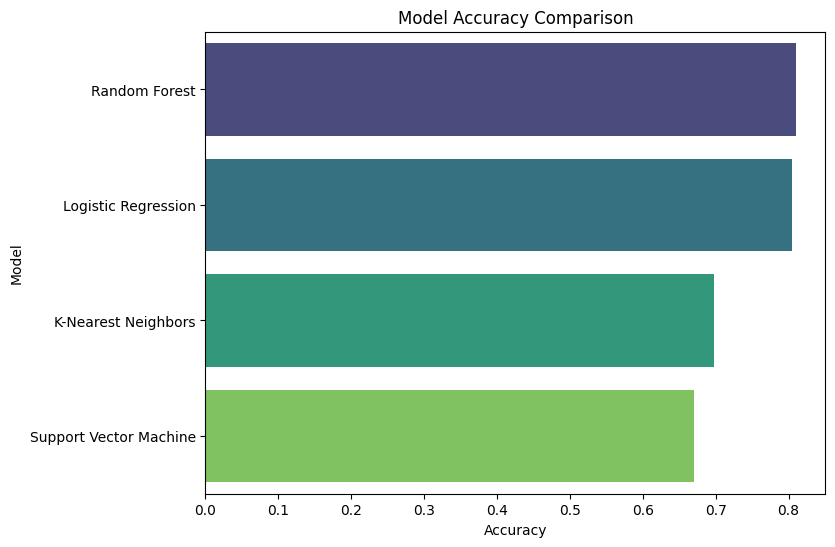

In [112]:
# Plot a bar chart to visualize model accuracy comparison
plt.figure(figsize=(8, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.show()

*Penjelasan:*

* Dicatat akurasi dari setiap model (*Random Forest, Logistic Regression, SVM, KNN*) dalam *dictionary model_accuracies*.
* Dibuat **DataFrame accuracy_df** untuk menyimpan dan mengurutkan akurasi model berdasarkan nilai tertinggi.
* Dibuat visualisasi berupa bar plot untuk memperlihatkan perbandingan akurasi model.